In [ ]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import sys
import os
import numpy as np
import matplotlib
from matplotlib import style
#style.use('ggplot')  # see http://matplotlib.org/users/style_sheets.html
# for info on matplotlib styles
import json

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'
import matplotlib.pyplot as plt
from pprint import pprint

# the first pandeia import is required to run calculations. the others are provided to
# allow setting up calculations and loading/saving of inputs or results.
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import get_telescope_config, get_instrument_config, build_default_calc, \
    build_default_source
from pandeia.engine.io_utils import read_json, write_json

In [29]:
calc = build_default_calc('roman', 'wfi', 'imaging')

results = perform_calculation(calc)

In [30]:
pprint(calc)

{'background': 'minzodi',
 'background_level': 'benchmark',
 'calculation': {'effects': {'saturation': None},
                 'noise': {'crs': None, 'ffnoise': None, 'scatter': None}},
 'configuration': {'detector': {'nexp': 1,
                                'ngroup': 10,
                                'nint': 1,
                                'readout_pattern': 'deep2',
                                'subarray': 'imaging'},
                   'dynamic_scene': True,
                   'instrument': {'aperture': 'imaging',
                                  'disperser': None,
                                  'filter': 'f087',
                                  'instrument': 'wfi',
                                  'mode': 'imaging'},
                   'max_scene_size': 25,
                   'scene_size': 5},
 'scene': [{'position': {'orientation': 0.0,
                         'position_parameters': ['x_offset',
                                                 'y_offset',
        

In [31]:
pprint(results)

{'1d': {'bg': [array([0.725     , 0.728314  , 0.72999996, 0.73196469, 0.73563368,
       0.73932106, 0.74000001, 0.74302692, 0.74675136, 0.75      ,
       0.75049446, 0.75425633, 0.75803706, 0.75999999, 0.76183673,
       0.76565546, 0.76949332, 0.76999998, 0.77335042, 0.77722686,
       0.77999991, 0.78112272, 0.78503812, 0.78897314, 0.78999996,
       0.79292788, 0.79690245, 0.79999995, 0.80089694, 0.80491145,
       0.80894609, 0.81      , 0.81300095, 0.81707613, 0.81999999,
       0.82117174, 0.82528788, 0.82942465, 0.82999998, 0.83358216,
       0.83776051, 0.83999997, 0.8419598 , 0.84618014, 0.84999996,
       0.85042164, 0.8546844 , 0.85896852, 0.85999995, 0.86327412,
       0.8676013 , 0.87      , 0.87195017, 0.87632083, 0.88      ,
       0.88071341, 0.88512801, 0.88956473, 0.88999999, 0.89402369,
       0.898505  , 0.89999998, 0.90300878, 0.90753513, 0.90999997,
       0.91208417, 0.91665601, 0.91999996, 0.92125076, 0.92586855,
       0.92899996, 0.93050949, 0.93517369, 0.93

In [32]:
detector = results['2d']['detector']

print(detector.shape)

(45, 45)


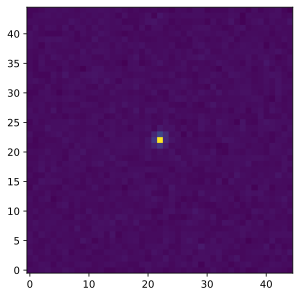

In [33]:
plt.imshow(detector)

add a second point source

In [34]:
pprint(build_default_source(geometry="point"))

{'position': {'orientation': 0.0,
              'position_parameters': ['x_offset', 'y_offset', 'orientation'],
              'x_offset': 0.0,
              'y_offset': 0.0},
 'shape': {'geometry': 'point', 'shape_parameters': []},
 'spectrum': {'extinction': {'bandpass': 'j',
                             'law': 'mw_rv_31',
                             'unit': 'mag',
                             'value': 0.0},
              'lines': [],
              'name': 'generic source',
              'normalization': {'norm_flux': 0.001,
                                'norm_fluxunit': 'mjy',
                                'norm_wave': 2.0,
                                'norm_waveunit': 'microns',
                                'type': 'at_lambda'},
              'redshift': 0.0,
              'sed': {'sed_type': 'flat', 'unit': 'fnu', 'z': 0.0},
              'spectrum_parameters': ['redshift',
                                      'normalization',
                                      'exti

In [35]:
calc['scene'].append(build_default_source(geometry="point"))

calc['scene'][1]['position']['x_offset'] = 1.0  # arcsec
calc['scene'][1]['position']['y_offset'] = 0.0  # arcsec
calc['scene'][1]['spectrum']['normalization']['norm_flux'] = 0.0001

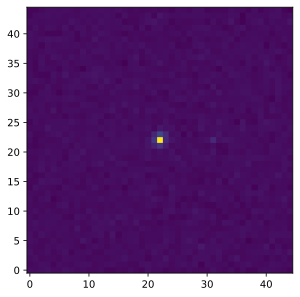

In [36]:
plt.imshow(perform_calculation(calc)['2d']['detector'])